# Part 4: Multiclass Image Classification w/ Convolutional Neural Networks

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Libraries</a></span></li><li><span><a href="#Image-Dataset" data-toc-modified-id="Image-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Image Dataset</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></span></li><li><span><a href="#Conclusion-&amp;-Future-Outlook" data-toc-modified-id="Conclusion-&amp;-Future-Outlook-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion &amp; Future Outlook</a></span></li><li><span><a href="#References" data-toc-modified-id="References-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>References</a></span></li></ul></div>

## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os, shutil
from keras import models, layers, optimizers
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import h5py
import cv2
from skimage.color import rgb2gray
from sklearn.model_selection import train_test_split,cross_val_score,KFold,StratifiedKFold
from sklearn.metrics import precision_score,recall_score,precision_recall_curve,f1_score,fbeta_score,confusion_matrix,accuracy_score,classification_report
import tensorflow.keras.models as Models
import tensorflow.keras.layers as Layers
import tensorflow.keras.utils as Utils
from sklearn.utils import shuffle
from random import randint
from scipy.interpolate import interp1d
from ipywidgets import interactive, FloatSlider
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.preprocessing import image
from sklearn import decomposition
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import warnings
warnings.filterwarnings('ignore')

## Image Dataset 

__Generating Classes For Multi Classification:__

In [5]:
multiclass_names = ['mountain',
                    'street',
                    'glacier',
                    'buildings',
                    'sea',
                    'forest']

multiclass_names_label = {class_name:i for i, class_name in enumerate(multiclass_names)}

image_size = (150, 150)

__Creating Train and Test Image Dataset For Multi Classification:__

In [61]:
def load_images(test_train_datasets):        
    images_and_labels_list = []
    # Interate through image datasets
    for dataset in test_train_datasets:
        
        images = []
        labels = []
                
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            current_label = multiclass_names_label[folder]
            
            # Interate through each image file in the train and test datasets
            for file in os.listdir(os.path.join(dataset, folder)):
                
                # Get the path name of the image
                image_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the image
                current_image = cv2.imread(image_path)
                current_image = cv2.resize(current_image, image_size) 
                
                # Append the image and its corresponding label to the images_and_labels_list
                images.append(current_image)
                labels.append(current_label)
        # Convert images and labels to numpy array        
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        # Append images and labels to images_and_labels_list        
        images_and_labels_list.append((images, labels))
    # Return the images and labels list
    return images_and_labels_list

In [63]:
test_train_datasets = ['../seg_train', '../seg_test']

In [9]:
(train_images_multiclass, train_labels_multiclass), (test_images_multiclass, test_labels_multiclass) = load_images(test_train_datasets)

In [10]:
train_images_multiclass, train_labels_multiclass = shuffle(train_images_multiclass, train_labels_multiclass)

In [11]:
train_images_multiclass = train_images_multiclass / 255.0 
test_images_multiclass = test_images_multiclass / 255.0

In [25]:
train_labels_multiclass = to_categorical(train_labels_multiclass,6)
test_labels_multiclass = to_categorical(test_labels_multiclass,6)

## Modeling

__CNN Model For Multi Classification:__

In [34]:
model_multiclass = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (4, 4), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (4, 4), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (4, 4), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    
    tf.keras.layers.Dropout(rate=0.5),

    tf.keras.layers.Dense(6, activation='softmax')
])

In [35]:
model_multiclass.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [36]:
# Training model w/ validation split of 30% from training data. 

trained_model_multiclass = model_multiclass.fit(train_images_multiclass, train_labels_multiclass, batch_size=16, epochs=30, validation_split = 0.3)


Train on 9823 samples, validate on 4211 samples
Epoch 1/30
9823/9823 [==============================] - 204s 21ms/sample - loss: 1.1545 - acc: 0.5401 - val_loss: 0.8376 - val_acc: 0.6818
Epoch 2/30
9823/9823 [==============================] - 206s 21ms/sample - loss: 0.8948 - acc: 0.6631 - val_loss: 0.7608 - val_acc: 0.7105
Epoch 3/30
9823/9823 [==============================] - 214s 22ms/sample - loss: 0.7642 - acc: 0.7142 - val_loss: 0.6689 - val_acc: 0.7528
Epoch 4/30
9823/9823 [==============================] - 207s 21ms/sample - loss: 0.6826 - acc: 0.7522 - val_loss: 0.6140 - val_acc: 0.7720
Epoch 5/30
9823/9823 [==============================] - 207s 21ms/sample - loss: 0.5983 - acc: 0.7836 - val_loss: 0.5993 - val_acc: 0.7768
Epoch 6/30
9823/9823 [==============================] - 209s 21ms/sample - loss: 0.5451 - acc: 0.8029 - val_loss: 0.6254 - val_acc: 0.7780
Epoch 7/30
9823/9823 [==============================] - 209s 21ms/sample - loss: 0.4884 - acc: 0.8221 - val_loss: 0.58

__Testing Multi Classification CNN Model On Test Images:__

In [37]:
trained_model_multiclass = model_multiclass.evaluate(test_images_multiclass, test_labels_multiclass)

3000/3000 [==============================] - 19s 6ms/sample - loss: 0.7576 - acc: 0.8097


__Predicting Class Of A Randomly Chosen Image:__

In [50]:
"""
The following function takes in class_names and their labels, 
and displays a random image with its predicted label.

"""
def display_random_image(class_names, images, labels):
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

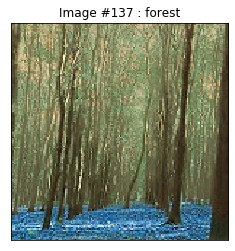

In [52]:
predictions = model_multiclass.predict(test_images_multiclass)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(multiclass_names, test_images_multiclass, pred_labels)

__Generating Train & Test Dataset From Augmented Multiclass Image Dataset:__

In [41]:
test_train_datasets = ['../multiclasss_augmented', '../seg_test']

(train_images_multiclass_augmented, train_labels_multiclass_augmented), (test_images_multiclass_augmented, test_labels_multiclass_augmented) = load_images(test_train_datasets)

In [42]:
train_images_multiclass_augmented, train_labels_multiclass_augmented = shuffle(train_images_multiclass_augmented, train_labels_multiclass_augmented)

In [43]:
train_images_multiclass_augmented = train_images_multiclass_augmented / 255.0 
test_images_multiclass_augmented = test_images_multiclass_augmented / 255.0

In [44]:
train_labels_multiclass_augmented = to_categorical(train_labels_multiclass_augmented,6)
test_labels_multiclass_augmented = to_categorical(test_labels_multiclass_augmented,6)

In [45]:
model_multiclass_augmented = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (4, 4), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (4, 4), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (4, 4), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    
    tf.keras.layers.Dropout(rate=0.5),

    tf.keras.layers.Dense(6, activation='softmax')
])

In [46]:
model_multiclass_augmented.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [47]:
# Training model w/ validation split of 30% from training data. 

trained_model_multiclass_augmented = model_multiclass_augmented.fit(train_images_multiclass_augmented, train_labels_multiclass_augmented, batch_size=16, epochs=30, validation_split = 0.3)


Train on 41995 samples, validate on 17999 samples
Epoch 1/30
41995/41995 [==============================] - 1065s 25ms/sample - loss: 1.0796 - acc: 0.5706 - val_loss: 0.8119 - val_acc: 0.6863
Epoch 2/30
41995/41995 [==============================] - 1056s 25ms/sample - loss: 0.8359 - acc: 0.6818 - val_loss: 0.7116 - val_acc: 0.7314
Epoch 3/30
41995/41995 [==============================] - 1050s 25ms/sample - loss: 0.7372 - acc: 0.7239 - val_loss: 0.6938 - val_acc: 0.7424
Epoch 4/30
41995/41995 [==============================] - 1052s 25ms/sample - loss: 0.6777 - acc: 0.7463 - val_loss: 0.6179 - val_acc: 0.7718
Epoch 5/30
41995/41995 [==============================] - 1049s 25ms/sample - loss: 0.6297 - acc: 0.7660 - val_loss: 0.5625 - val_acc: 0.7934
Epoch 6/30
41995/41995 [==============================] - 1035s 25ms/sample - loss: 0.5999 - acc: 0.7775 - val_loss: 0.5771 - val_acc: 0.7897
Epoch 7/30
41995/41995 [==============================] - 1031s 25ms/sample - loss: 0.5753 - acc: 

In [48]:
trained_model_multiclass_augmented = model_multiclass_augmented.evaluate(test_images_multiclass_augmented, test_labels_multiclass_augmented)

3000/3000 [==============================] - 21s 7ms/sample - loss: 0.8081 - acc: 0.8090


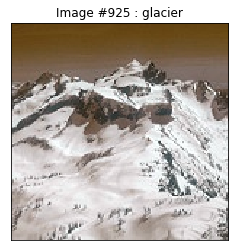

In [54]:
predictions = model_multiclass_augmented.predict(test_images_multiclass_augmented) # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(multiclass_names, test_images_multiclass_augmented, pred_labels)

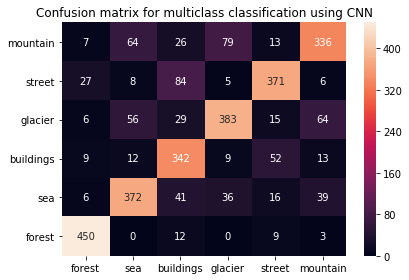

In [26]:
CM = confusion_matrix(test_labels_multiclass_augmented, pred_labels)
ax = plt.axes()

sns.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=multiclass_names, 
           yticklabels=multiclass_names, ax = ax,fmt='d')
ax.set_title('Confusion matrix for multiclass classification using CNN')
b, t = plt.ylim() # Discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t)
plt.xlim(b, t)
plt.savefig('ConfusionMatrixMultiClass_CNN.png',dpi=600)
plt.tight_layout()
plt.show()

## Conclusion & Future Outlook

In summary, random forest was able to reach an accuracy score of 96% for multiclass classification. We can make further improvements in accuracy by collecting more data, followed by image augmentation. Besides, advanced image processing steps like contrast stretching and adaptative equalization can be utilized. Furthermore, transfer learning can play a significant role where by using the features of a pre-trained neural network and finetuning the layers, we can improve the classification accuracy. 

## References

1. https://gogul.dev/software/image-classification-python
2. https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
3. https://becominghuman.ai/building-an-image-classifier-using-deep-learning-in-python-totally-from-a-beginners-perspective-be8dbaf22dd8
4. https://github.com/manashpratim/Intel-image-Classification/blob/master/Intel_Image_Classification.ipynb